In [1]:
# import neseccary libaray 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from prophet import Prophet


## Data Exploration and Cleaning

In [2]:
# read Dataset
data = pd.read_csv("/kaggle/input/retail-inventory-and-sales-data/data.csv")
data.head()

,Department,Class,Size,Inventory Units,Full Price Inventory Units,Markdown Inventory Units,Inventory Value,Full Price Inventory Value,Markdown Inventory Value,Units Sold,Full Price Units Sold,Markdown Units Sold,Sales,Full Price Sales,Markdown Sales
0,Casual Wear,Denim,24,64,64,0,"$1,327.62","$1,327.62",$0.00,5,5,0,$114.95,$114.95,$0.00
1,Casual Wear,Denim,24X28,21,21,0,$517.29,$517.29,$0.00,2,2,0,$28.74,$28.74,$0.00
2,Casual Wear,Denim,24x30,73,68,5,"$1,618.08","$1,518.08",$100.00,4,0,4,$75.00,$0.00,$75.00
3,Casual Wear,Denim,25,68,68,0,"$1,495.58","$1,495.58",$0.00,1,1,0,$18.99,$18.99,$0.00
4,Casual Wear,Denim,25x28,64,64,0,"$1,599.36","$1,599.36",$0.00,2,2,0,$49.98,$49.98,$0.00


In [3]:
df= data.copy()
# Check for missing values
print("\nMissing values:")
print((df.isnull().sum()/len(df))*100)

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Data types of columns
print("\nData types:")
print(df.dtypes)


Missing values:
Department                    0.000000
Class                         0.000000
Size                          3.321879
Inventory Units               0.000000
Full Price Inventory Units    0.000000
Markdown Inventory Units      0.000000
Inventory Value               0.000000
Full Price Inventory Value    0.000000
Markdown Inventory Value      0.000000
Units Sold                    0.000000
Full Price Units Sold         0.000000
Markdown Units Sold           0.000000
Sales                         0.000000
Full Price Sales              0.000000
Markdown Sales                0.000000
dtype: float64

Summary statistics:
       Markdown Units Sold
count          1746.000000
mean              6.870561
std              17.252993
min               0.000000
25%               0.000000
50%               0.000000
75%               5.000000
max             219.000000

Data types:
Department                    object
Class                         object
Size                          ob

In [4]:
# Handle missing values (3% missing )
df.dropna(axis=0,inplace=True)
df.isnull().sum()

Department                    0
Class                         0
Size                          0
Inventory Units               0
Full Price Inventory Units    0
Markdown Inventory Units      0
Inventory Value               0
Full Price Inventory Value    0
Markdown Inventory Value      0
Units Sold                    0
Full Price Units Sold         0
Markdown Units Sold           0
Sales                         0
Full Price Sales              0
Markdown Sales                0
dtype: int64

In [5]:
# Check for duplicates
print("\nDuplicate rows:")
df.duplicated().sum()


Duplicate rows:


0

### **reference for the converted columns**

In [6]:
# Create a DataFrame reference for the converted columns
conversion_reference = pd.DataFrame()

# Iterate over categorical columns and add codes to the reference DataFrame
for column in ["Department","Class","Size"]:
    codes = pd.Categorical(df[column]).codes
    conversion_reference[column] = df[column]
    conversion_reference[f'{column}_code'] = codes
# print(conversion_reference)

def convert():
    for column in ["Department","Class","Size"]:
        df[column]=pd.Categorical(df[column]).codes
    return df.head()
convert()

,Department,Class,Size,Inventory Units,Full Price Inventory Units,Markdown Inventory Units,Inventory Value,Full Price Inventory Value,Markdown Inventory Value,Units Sold,Full Price Units Sold,Markdown Units Sold,Sales,Full Price Sales,Markdown Sales
0,5,24,111,64,64,0,"$1,327.62","$1,327.62",$0.00,5,5,0,$114.95,$114.95,$0.00
1,5,24,116,21,21,0,$517.29,$517.29,$0.00,2,2,0,$28.74,$28.74,$0.00
2,5,24,121,73,68,5,"$1,618.08","$1,518.08",$100.00,4,0,4,$75.00,$0.00,$75.00
3,5,24,122,68,68,0,"$1,495.58","$1,495.58",$0.00,1,1,0,$18.99,$18.99,$0.00
4,5,24,128,64,64,0,"$1,599.36","$1,599.36",$0.00,2,2,0,$49.98,$49.98,$0.00


####  now we have an issue with data type format ?
- we will creat a function to convert categorical to float type

In [7]:

def convert_categorical_to_float(df):
    """
    Convert all categorical columns in a DataFrame to float.
    """
    converted_df = df.copy()
    
    # Identify categorical columns
    categorical_columns = converted_df.select_dtypes(include='object').columns
    
    # Convert categorical columns to float
    for column in categorical_columns:
        converted_df[f'{column}_float'] = converted_df[column].str.replace(',', '').str.replace('$', '').astype(float)



        converted_df.drop(columns=[column], inplace=True)  # Drop the original categorical column','
    
    return converted_df

# Call the function
df_converted = convert_categorical_to_float(df)

# Display the converted DataFrame
df_converted.head()


,Department,Class,Size,Markdown Units Sold,Inventory Units_float,Full Price Inventory Units_float,Markdown Inventory Units_float,Inventory Value_float,Full Price Inventory Value_float,Markdown Inventory Value_float,Units Sold_float,Full Price Units Sold_float,Sales_float,Full Price Sales_float,Markdown Sales_float
0,5,24,111,0,64.0,64.0,0.0,1327.62,1327.62,0.0,5.0,5.0,114.95,114.95,0.0
1,5,24,116,0,21.0,21.0,0.0,517.29,517.29,0.0,2.0,2.0,28.74,28.74,0.0
2,5,24,121,4,73.0,68.0,5.0,1618.08,1518.08,100.0,4.0,0.0,75.00,0.00,75.0
3,5,24,122,0,68.0,68.0,0.0,1495.58,1495.58,0.0,1.0,1.0,18.99,18.99,0.0
4,5,24,128,0,64.0,64.0,0.0,1599.36,1599.36,0.0,2.0,2.0,49.98,49.98,0.0


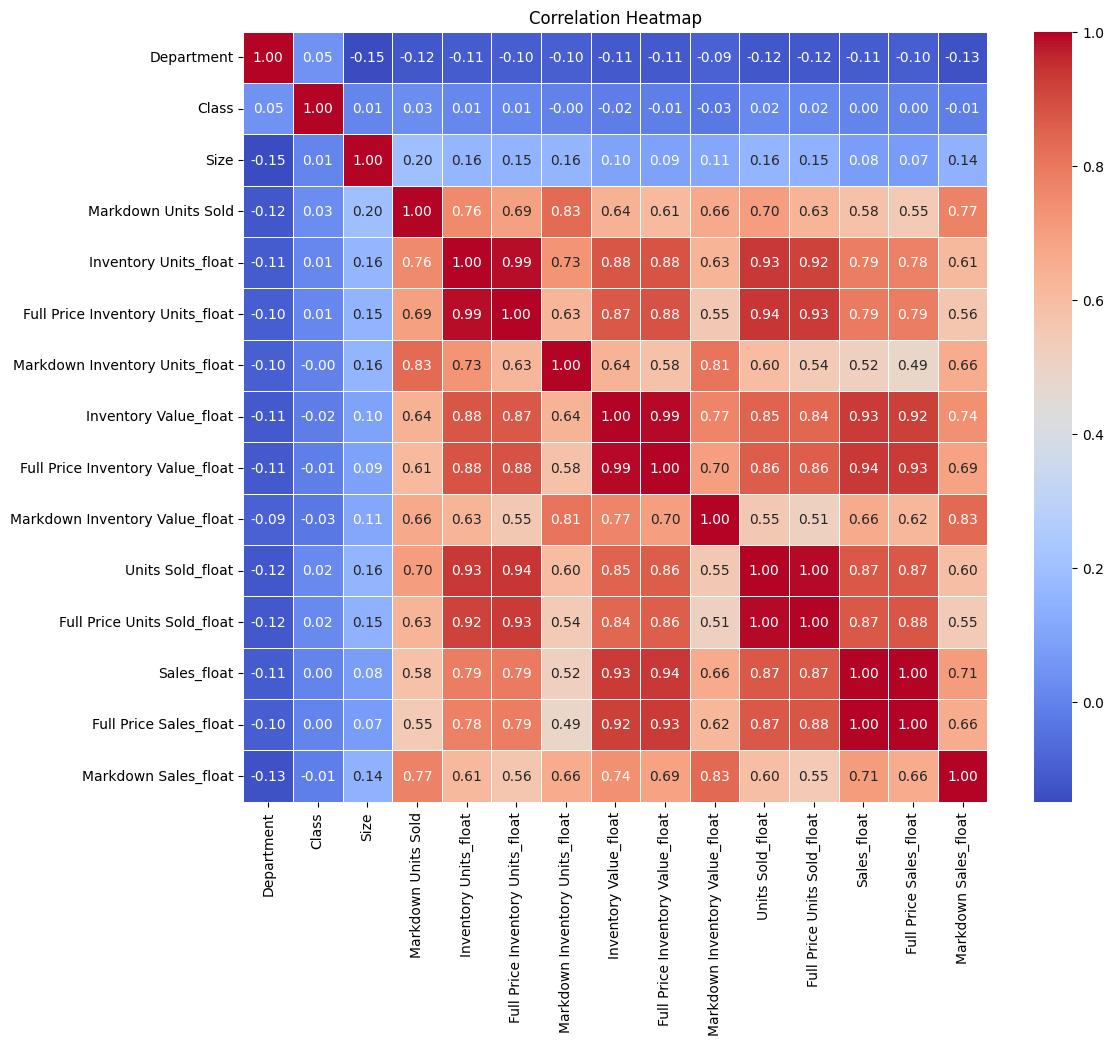

In [8]:

# Create a correlation matrix
correlation_matrix = df_converted.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Customize the plot
plt.title('Correlation Heatmap')
plt.show()

In [9]:
len(df_converted)


1688

## Demand Forecasting: 
### This can help optimize inventory levels and enhance planning.
- The goal here is to assume a period of history and combine it with the data to make a prediction of     sales and units sold
- creating a custom random date for this data to generate a time series dataset with exactly 1688 days
- Hint:
    - p = 5 indicates that the model considers the last 5 observations for autoregression.
    - d = 1 indicates that first-order differencing is applied to make the time series stationary.
    - q = 0 indicates that the model does not include a moving average component.

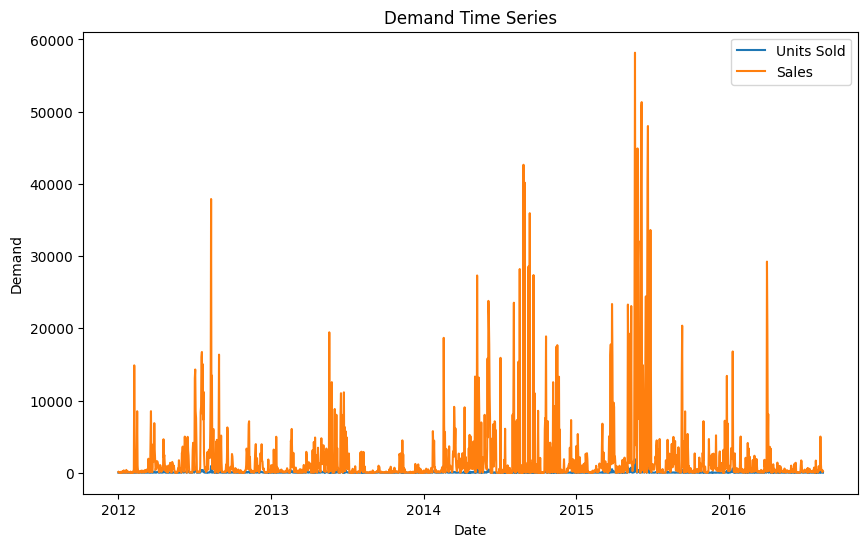

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

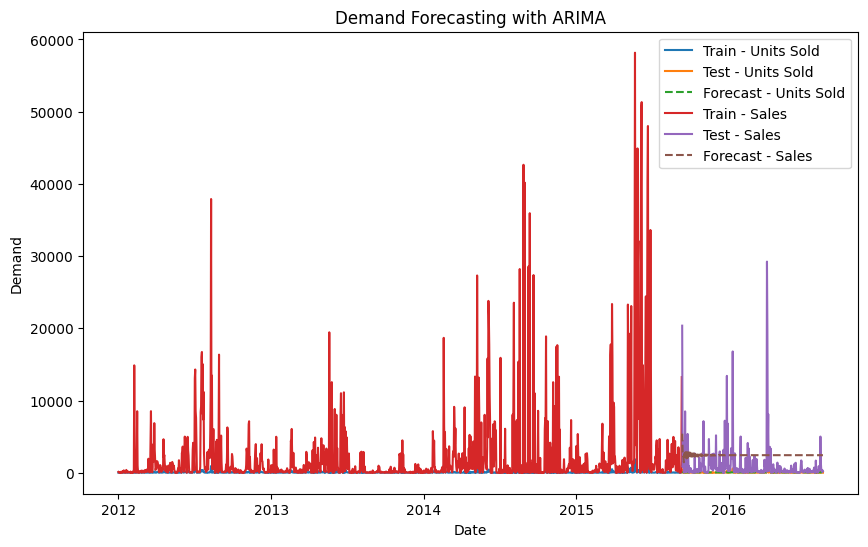

Root Mean Squared Error (RMSE) - Units Sold: 98.36292982762062
Root Mean Squared Error (RMSE) - Sales: 2994.110569752329


In [10]:

# Set the number of days
num_days = 1688

# Sample dataset with exactly 1688 days
dtime = {'Date': pd.date_range(start='2012-01-01', periods=num_days, freq='D'),
        'Units Sold': df_converted["Units Sold_float"],
        'Sales': df_converted["Sales_float"]}
df = pd.DataFrame(dtime)
df.set_index('Date', inplace=True)

# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['Units Sold'], label='Units Sold')
plt.plot(df['Sales'], label='Sales')
plt.title('Demand Time Series')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fit ARIMA model for 'Units Sold'
order_units_sold = (7, 1, 4) #tune as needed the parameter (p, d, q) is used to specify the order of the model.
model_units_sold = ARIMA(train['Units Sold'], order=order_units_sold)
model_units_sold_fit = model_units_sold.fit()
forecast_units_sold = model_units_sold_fit.forecast(steps=len(test))

# Fit ARIMA model for 'Sales'
order_sales = (7, 1, 4) 
model_sales = ARIMA(train['Sales'], order=order_sales)
model_sales_fit = model_sales.fit()
forecast_sales = model_sales_fit.forecast(steps=len(test))

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Units Sold'], label='Train - Units Sold')
plt.plot(test.index, test['Units Sold'], label='Test - Units Sold')
plt.plot(test.index, forecast_units_sold, label='Forecast - Units Sold', linestyle='dashed')

plt.plot(train.index, train['Sales'], label='Train - Sales')
plt.plot(test.index, test['Sales'], label='Test - Sales')
plt.plot(test.index, forecast_sales, label='Forecast - Sales', linestyle='dashed')

plt.title('Demand Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

# Evaluate the models
mse_units_sold = mean_squared_error(test['Units Sold'], forecast_units_sold)
rmse_units_sold = sqrt(mse_units_sold)
print(f'Root Mean Squared Error (RMSE) - Units Sold: {rmse_units_sold}')

mse_sales = mean_squared_error(test['Sales'], forecast_sales)
rmse_sales = sqrt(mse_sales)
print(f'Root Mean Squared Error (RMSE) - Sales: {rmse_sales}')


## prophet model

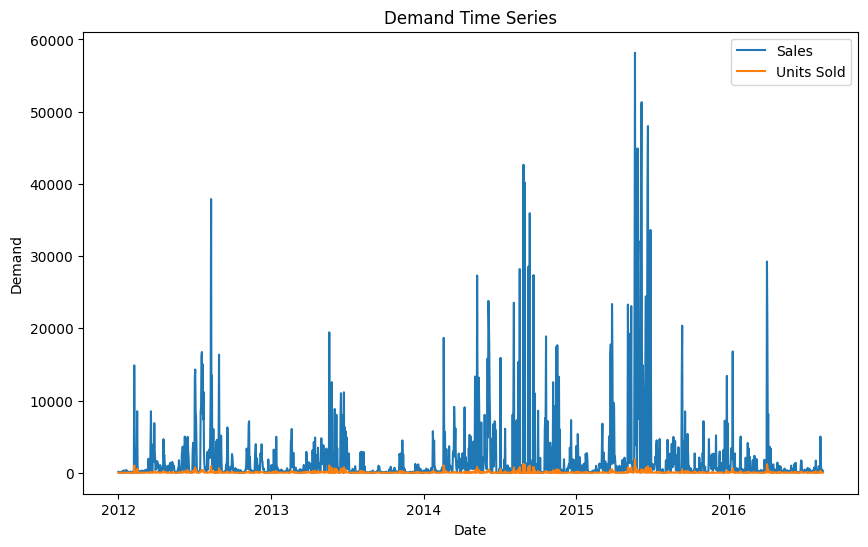

06:33:37 - cmdstanpy - INFO - Chain [1] start processing
06:33:37 - cmdstanpy - INFO - Chain [1] done processing
06:33:37 - cmdstanpy - INFO - Chain [1] start processing
06:33:37 - cmdstanpy - INFO - Chain [1] done processing


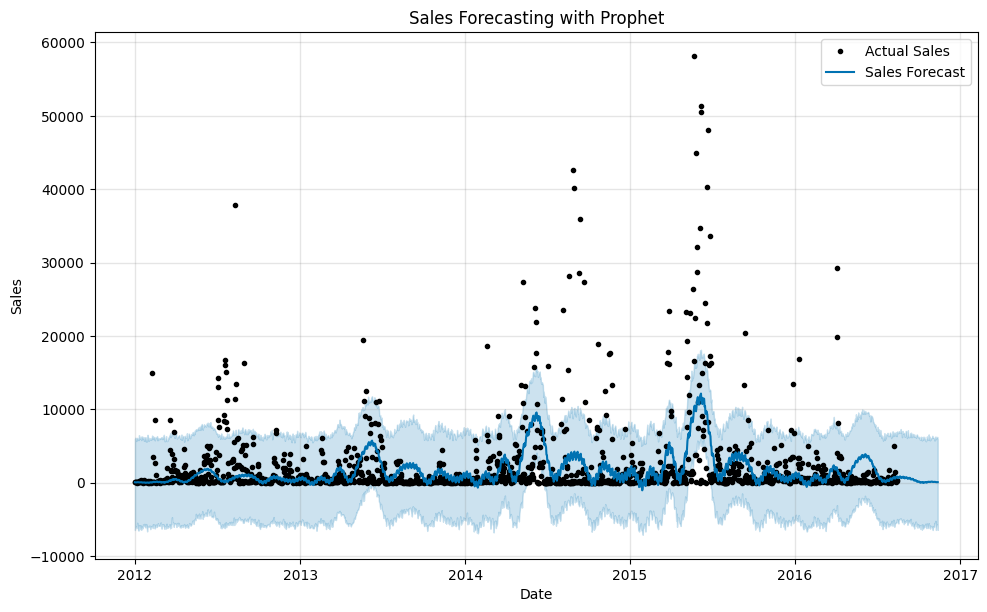

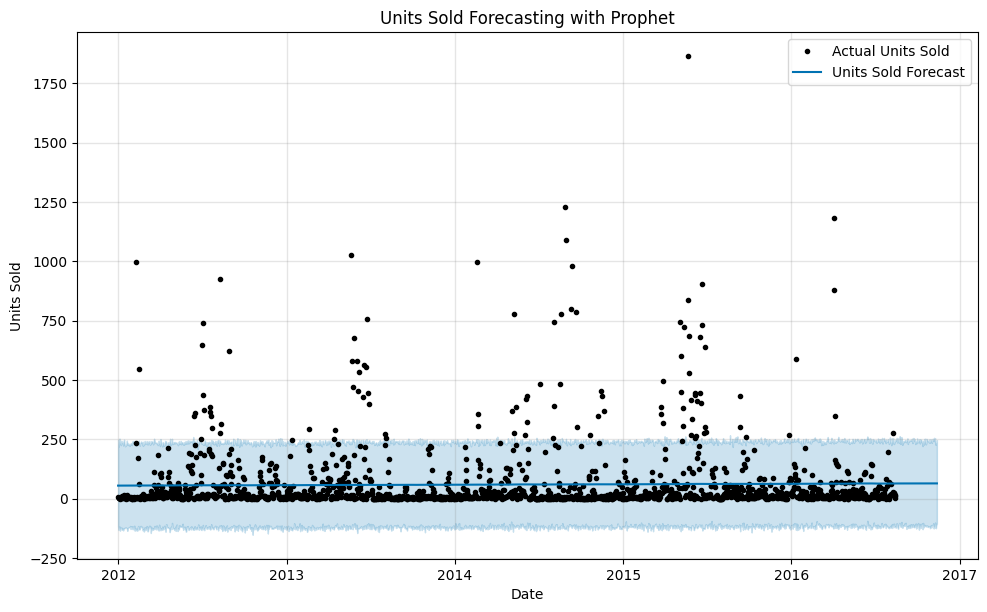

In [11]:
num_days =1688
# Sample dataset with exactly 1688 days
data = {'Date': pd.date_range(start='2012-01-01', periods=num_days, freq='D'),
        'Sales': df_converted["Sales_float"],
        'Units Sold':df_converted["Units Sold_float"]}
df = pd.DataFrame(data)

# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Sales'], label='Sales')
plt.plot(df['Date'], df['Units Sold'], label='Units Sold')
plt.title('Demand Time Series')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

# Prepare data for Sales forecasting
sales_data = df[['Date', 'Sales']]
sales_data = sales_data.rename(columns={'Date': 'ds', 'Sales': 'y'})

# Fit Prophet model for Sales
sales_model = Prophet(changepoint_prior_scale=0.005,  
    seasonality_prior_scale=10, 
    holidays_prior_scale=15,  
    seasonality_mode='multiplicative',  
    growth='linear',  # or 'logistic'
    daily_seasonality=True)
sales_model.fit(sales_data)

# Prepare data for Units Sold forecasting
units_sold_data = df[['Date', 'Units Sold']]
units_sold_data = units_sold_data.rename(columns={'Date': 'ds', 'Units Sold': 'y'})

# Fit Prophet model for Units Sold
units_sold_model = Prophet(changepoint_prior_scale=0.005,  
    seasonality_prior_scale=10, 
    holidays_prior_scale=15,  
    seasonality_mode='multiplicative',  
    growth='linear',  # or 'logistic'
    daily_seasonality=True)
units_sold_model.fit(units_sold_data)

# Create dataframes with future dates for forecasting
future_sales = sales_model.make_future_dataframe(periods=90)
future_units_sold = units_sold_model.make_future_dataframe(periods=90)

# Forecast future values
forecast_sales = sales_model.predict(future_sales)
forecast_units_sold = units_sold_model.predict(future_units_sold)

# Visualize the results for Sales
fig_sales = sales_model.plot(forecast_sales)
plt.title('Sales Forecasting with Prophet')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(['Actual Sales', 'Sales Forecast'])  
plt.show()

# Visualize the results for Units Sold
fig_units_sold = units_sold_model.plot(forecast_units_sold)
plt.title('Units Sold Forecasting with Prophet')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend(['Actual Units Sold', 'Units Sold Forecast'])  
plt.show()

In [12]:
# Calculate RMSE for Sales
mse_sales = mean_squared_error(df['Sales'], forecast_sales['yhat'][:num_days])
rmse_sales = sqrt(mse_sales)
print(f'RMSE for Sales: {rmse_sales}')

# Calculate RMSE for Units Sold
mse_units_sold = mean_squared_error(df['Units Sold'], forecast_units_sold['yhat'][:num_days])
rmse_units_sold = sqrt(mse_units_sold)
print(f'RMSE for Units Sold: {rmse_units_sold}')


RMSE for Sales: 4713.582949984143
RMSE for Units Sold: 140.7515930397219


In [13]:
## To be completed later